In [55]:
import pandas as pd
import matplotlib.pyplot as plt
df_happydb = pd.read_csv('DATA/cleaned_hm.csv')
# link to dataset: https://github.com/megagonlabs/HappyDB

In [56]:
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import GRU, Dense, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import time
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import TruncatedSVD
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier



from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

DATASET

In [57]:
print(df_happydb.head())
print(len(df_happydb))
print(df_happydb['predicted_category'].unique())
df_happydb.info()

    hmid   wid reflection_period  \
0  27673  2053               24h   
1  27674     2               24h   
2  27675  1936               24h   
3  27676   206               24h   
4  27677  6227               24h   

                                         original_hm  \
0  I went on a successful date with someone I fel...   
1  I was happy when my son got 90% marks in his e...   
2       I went to the gym this morning and did yoga.   
3  We had a serious talk with some friends of our...   
4  I went with grandchildren to butterfly display...   

                                          cleaned_hm  modified  num_sentence  \
0  I went on a successful date with someone I fel...      True             1   
1  I was happy when my son got 90% marks in his e...      True             1   
2       I went to the gym this morning and did yoga.      True             1   
3  We had a serious talk with some friends of our...      True             2   
4  I went with grandchildren to butterfly disp

In [58]:
print(df_happydb.iloc[0])
print(len(df_happydb))
print(df_happydb['predicted_category'].unique())

hmid                                                                 27673
wid                                                                   2053
reflection_period                                                      24h
original_hm              I went on a successful date with someone I fel...
cleaned_hm               I went on a successful date with someone I fel...
modified                                                              True
num_sentence                                                             1
ground_truth_category                                                  NaN
predicted_category                                               affection
Name: 0, dtype: object
100535
['affection' 'exercise' 'bonding' 'leisure' 'achievement'
 'enjoy_the_moment' 'nature']


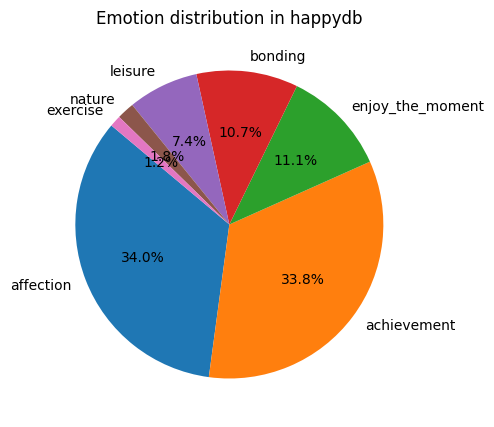

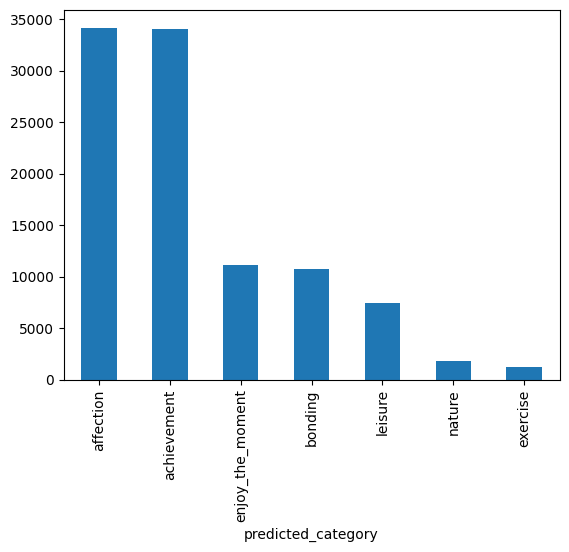

In [59]:
label_counts = df_happydb['predicted_category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion distribution in happydb')
plt.show()
label_counts.plot.bar()
plt.show()

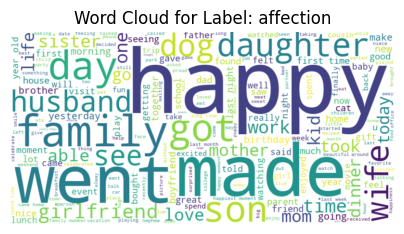

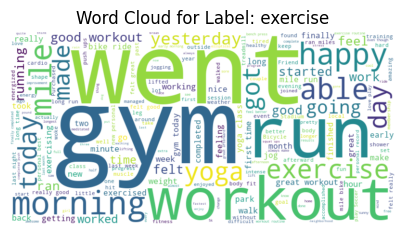

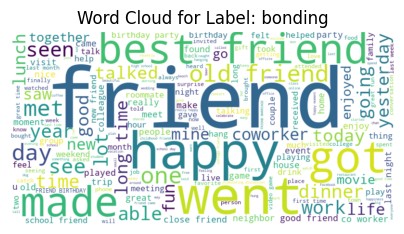

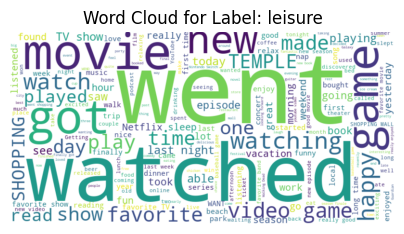

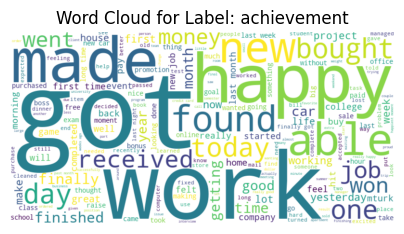

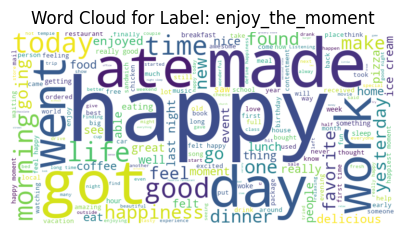

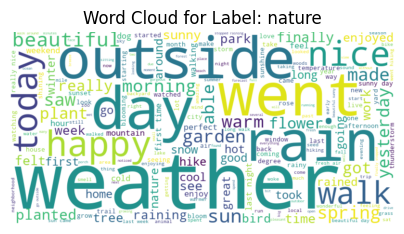

In [60]:

for l in df_happydb['predicted_category'].unique():
    df1 = df_happydb[df_happydb['predicted_category']==l]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['cleaned_hm']))
    plt.figure(figsize=(5, 2.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {l}')
    plt.axis('off')
    plt.show()

In [61]:


emotions = ['affection', 'exercise', 'bonding', 'leisure', 'achievement', 'enjoy_the_moment', 'nature']

def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

n_grams = {}

for emotion in emotions:
    text_data = df_happydb[df_happydb['predicted_category'] == emotion]['cleaned_hm'].values
    n_grams[emotion] = {
        'unigrams': get_top_n_gram(text_data, (1, 1), 7),
        'bigrams': get_top_n_gram(text_data, (2, 2), 7),
        'trigrams': get_top_n_gram(text_data, (3, 3), 7)
    }

def plot_n_grams(emotion):
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    fig.suptitle(f'Category: {emotion.capitalize()}')

    for i, gram_type in enumerate(['unigrams', 'bigrams', 'trigrams']):
        words, freqs = zip(*n_grams[emotion][gram_type])
        sns.barplot(x=list(words), y=list(freqs), ax=axes[i])
        axes[i].set_title(gram_type.capitalize())
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_xlabel('')

    plt.tight_layout()
    plt.savefig(f'{emotion}.png', bbox_inches='tight')
    plt.close()

for emotion in emotions:
    plot_n_grams(emotion)

C:\Users\Anandhini\AppData\Local\Temp\ipykernel_15048\1227647863.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_15048\1227647863.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_15048\1227647863.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_15048\1227647863.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_15048\1227647863.py:29: UserWarning: FixedFormatter 

DATA PROCESSING

In [67]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
def cleaning (text):
    text = text.lower()
    text =  re.sub(r'http\S+', '',text) # remove urls
    text= re.sub("\s[\s]+", " ",text).strip() # remove repeated/leading/trailing spaces
    text =  re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚ']", ' ',text) # only keeps characters
    text =  re.sub(r'\s+[a-zA-ZáéíóúÁÉÍÓÚ]\s+', ' ', text+' ')  # remove single letter word
    text = "".join([i for i in text if i not in string.punctuation])
    words = word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords])
    text= re.sub("\s[\s]+", " ",text).strip()
    
    return text
        

In [68]:
df_happydb['cleaned_text'] = df_happydb['cleaned_hm'].apply(cleaning)

In [69]:
def lemm(data):
    wordnet = WordNetLemmatizer()
    data['lemm'] =  [[wordnet.lemmatize(w) for w in word_tokenize(data['cleaned_text'].iloc[i])] for i in range(len(data))]
    data['cleaned_text'] = data['lemm'].apply(' '.join)
    data=data.drop("lemm",axis=1)
    return data
df_happydb=lemm(df_happydb)
df_happydb.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,label,cleaned_text
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,0,went successful date someone felt sympathy con...
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,0,happy son got mark examination
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,1,went gym morning yoga
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,2,serious talk friend flaky lately understood go...
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,0,went grandchild butterfly display crohn conser...


In [64]:
category_to_numeric = {category: index for index, category in enumerate(df_happydb['predicted_category'].unique())}
df_happydb['label'] = df_happydb['predicted_category'].map(category_to_numeric)
df_happydb.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,label
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,0
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,0
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,1
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,2
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,0


TRAIN TEST SPLIT

In [12]:
X = df_happydb['cleaned_text']
X2 = df_happydb['cleaned_hm']
y = df_happydb['label']
y2 = df_happydb['predicted_category']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [17]:
# Vectorization with TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train2)
X_test_vec = vectorizer.transform(X_test2)

In [19]:
y_train2=np.array(y_train2)
y_test2=np.array(y_test2)

In [21]:

numeric_to_category = {v: k for k, v in category_to_numeric.items()}
numeric_to_category

{0: 'affection',
 1: 'exercise',
 2: 'bonding',
 3: 'leisure',
 4: 'achievement',
 5: 'enjoy_the_moment',
 6: 'nature'}

## Baseline model : Random forest and decision tree

In [34]:
## FEATURE SELECTION FOR RANDOM FOREST AND DECISION TREE
y_train_vec = y_train2
y_test_vec = y_test2
svd = TruncatedSVD(n_components=50)
X_train_pca = svd.fit_transform(X_train_vec)
X_test_pca = svd.transform(X_test_vec)

print('Training features matrix is: ', X_train_pca.shape)
print('Test features matrix is: ', X_test_pca.shape)

Training features matrix is:  (80428, 50)
Test features matrix is:  (20107, 50)


In [39]:
s1 = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train2)
rf_predictions = rf_model.predict(X_test_pca)
e1= time.time()
s2 = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_train2)
dt_predictions = dt_model.predict(X_test_pca)
e2=time.time()

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return accuracy, precision, recall, f1, mse, rmse

rf_metrics = calculate_metrics(y_test2, rf_predictions)
dt_metrics = calculate_metrics(y_test2, dt_predictions)
# without pca the model doesnt finish using normal features.


TypeError: unsupported format string passed to tuple.__format__

In [41]:
print(f"Random Forest Results: Accuracy: {rf_metrics[0]:.4f}, Precision: {rf_metrics[1]:.4f}, Recall: {rf_metrics[2]:.4f}, F1 Score: {rf_metrics[3]:.4f}, MSE: {rf_metrics[4]:.4f}, RMSE: {rf_metrics[5]:.4f}")
print(f"Time to run random forest:{e1-s1:.2f} seconds")
print(f"Decision Tree Results: Accuracy: {dt_metrics[0]:.4f}, Precision: {dt_metrics[1]:.4f}, Recall: {dt_metrics[2]:.4f}, F1 Score: {dt_metrics[3]:.4f}, MSE: {dt_metrics[4]:.4f}, RMSE: {dt_metrics[5]:.4f}")
print(f"Time to run decision tree:{e2-s2:.2f} seconds")

Random Forest Results: Accuracy: 0.7639, Precision: 0.7725, Recall: 0.7639, F1 Score: 0.7469, MSE: 2.0307, RMSE: 1.4250
Time to run random forest:514.49 seconds
Decision Tree Results: Accuracy: 0.6128, Precision: 0.6177, Recall: 0.6128, F1 Score: 0.6151, MSE: 3.4763, RMSE: 1.8645
Time to run decision tree:41.84 seconds


## Regression

In [57]:

s = time.time()
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_vec, y_train2)
lr_predictions = lr_model.predict(X_test_vec)
lr_accuracy = accuracy_score(y_test2, lr_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, lr_predictions, average='weighted')
mse = mean_squared_error(y_test2, lr_predictions)
rmse = np.sqrt(mse)
e = time.time()
print(f"Runtime: {e-s:.2f} seconds")
print(f"Logistic Regression Results: Accuracy: {lr_accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")




Runtime: 8.91 seconds
Logistic Regression Results: Accuracy: 0.9261, Precision: 0.9263, Recall: 0.9261, F1 Score: 0.9248, MSE: 0.5202, RMSE: 0.7212


In [60]:
y_test2

10484    0
40401    4
28905    0
42741    0
68854    5
        ..
92903    2
51359    3
20668    5
10881    0
85940    0
Name: label, Length: 20107, dtype: int64

In [74]:
print("wrong predictions")
i = 0
j = 0
predicted_labels = lr_predictions
while i < 15 and j < 100000:
    if lr_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[lr_predictions[j]]}")
        i += 1
    j += 1

wrong predictions
True: achievement, Predicted: affection
True: leisure, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: enjoy_the_moment
True: bonding, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: achievement
True: achievement, Predicted: bonding
True: bonding, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: affection, Predicted: achievement
True: leisure, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: enjoy_the_moment


In [83]:
selector = SelectKBest(score_func=f_regression, k=100)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)
X_train_selected = selector.fit_transform(X_train_vec, y_train2)
X_test_selected = selector.transform(X_test_vec)

y_train_onehot = onehot_encoder.fit_transform(y_train2.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test2.reshape(-1, 1))
s = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train_onehot)

#Runtime: 47.74 seconds
#Linear Regression Results: Accuracy: 0.8920, Precision: 0.9263, Recall: 0.9261, F1 Score: 0.9248, MSE: 0.5202, RMSE: 0.7212
lr_model = LinearRegression()
lr_model.fit(X_train_vec, y_train_onehot)
lr_predictions_prob = lr_model.predict(X_test_vec)
lr_predictions = np.argmax(lr_predictions_prob, axis=1)
e = time.time()
# Calculate metrics
lr_accuracy = accuracy_score(y_test2, lr_predictions)
lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_test2, lr_predictions, average='weighted')
lr_mse = mean_squared_error(y_test_onehot, lr_predictions_prob)
lr_rmse = np.sqrt(lr_mse)
print(f"Runtime: {e-s:.2f} seconds")
print(f"Linear Regression Results: Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1 Score: {lr_f1:.4f}, MSE: {lr_mse:.4f}, RMSE: {lr_rmse:.4f}")

c:\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Runtime: 48.35 seconds
Linear Regression Results: Accuracy: 0.8920, Precision: 0.9263, Recall: 0.9261, F1 Score: 0.9248, MSE: 0.5202, RMSE: 0.7212


In [85]:
print("wrong predictions")
i = 0
j = 0
predicted_labels = lr_predictions
while i < 15 and j < 100000:
    if lr_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[lr_predictions[j]]}")
        i += 1
    j += 1

wrong predictions
True: achievement, Predicted: affection
True: leisure, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: enjoy_the_moment
True: bonding, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: achievement
True: achievement, Predicted: bonding
True: bonding, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: affection, Predicted: achievement
True: leisure, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: enjoy_the_moment


## LSTM

In [70]:
X = df_happydb['cleaned_text'].values
y = df_happydb['label'].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:

max_words = len(set(word for sentence in X_train for word in sentence.split()))
max_len = max(len(sentence.split()) for sentence in X_train)
print(max_words," ",max_len)

19780   648


In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [75]:

model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
epochs = 3
s=time.time()
history = model.fit(X_train_pad, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)
e=time.time()
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
predictions = model.predict(X_test_pad)

e = time.time()
print(f"Runtime: {e-s:.2f} seconds")
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_labels, average='weighted')
mse = mean_squared_error(y_test,predicted_labels)
rmse = np.sqrt(mse)
print(f"LSTM Results: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
print(accuracy)
print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if rnn_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[rnn_predictions[j]]}")
        i += 1
    j += 1

Epoch 1/3
1132/1132 [==============================] - 5197s 5s/step - loss: 0.5404 - accuracy: 0.8113 - val_loss: 0.3181 - val_accuracy: 0.8871
Epoch 2/3
1132/1132 [==============================] - 3946s 3s/step - loss: 0.2400 - accuracy: 0.9152 - val_loss: 0.2843 - val_accuracy: 0.8954
Epoch 3/3
629/629 [==============================] - 108s 171ms/step
Runtime: 15783.08 seconds
LSTM Results: Accuracy: 0.8953, Precision: 0.8945, Recall: 0.8953, F1 Score: 0.8945, MSE: 0.8466, RMSE: 0.9201
0.89531010389328
Wrong predictions


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [77]:
i = 0
j = 0
while i < 15 and j < 100000:
    if predicted_labels[j] != y_test[j]:
        print(f"True: {numeric_to_category[y_test[j]]}, Predicted: {numeric_to_category[predicted_labels[j]]}")
        i += 1
    j += 1

True: enjoy_the_moment, Predicted: affection
True: achievement, Predicted: affection
True: bonding, Predicted: achievement
True: achievement, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: enjoy_the_moment
True: leisure, Predicted: achievement
True: achievement, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: affection
True: achievement, Predicted: leisure
True: achievement, Predicted: bonding
True: enjoy_the_moment, Predicted: achievement
True: affection, Predicted: achievement


## BiLSTM and BiGRU

In [48]:
from tensorflow.keras.layers import Bidirectional

bilstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(7, activation='softmax')
])

bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 3
s = time.time()
bilstm_history = bilstm_model.fit(X_train_pad, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)
e = time.time()

bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_pad, y_test, verbose=0)
bilstm_predictions = bilstm_model.predict(X_test_pad)
bilstm_predicted_labels = le.inverse_transform(np.argmax(bilstm_predictions, axis=1))
bilstm_precision, bilstm_recall, bilstm_f1, _ = precision_recall_fscore_support(y_test, bilstm_predicted_labels, average='weighted')
bilstm_mse = mean_squared_error(y_test, bilstm_predicted_labels)
bilstm_rmse = np.sqrt(bilstm_mse)

print(f"Runtime: {e-s:.2f} seconds")
print(f"BiLSTM Results: Accuracy: {bilstm_accuracy:.4f}, Precision: {bilstm_precision:.4f}, Recall: {bilstm_recall:.4f}, F1 Score: {bilstm_f1:.4f}, MSE: {bilstm_mse:.4f}, RMSE: {bilstm_rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if bilstm_predicted_labels[j] != y_test[j]:
        print(f"True: {numeric_to_category[y_test[j]]}, Predicted: {numeric_to_category[bilstm_predicted_labels[j]]}")
        i += 1
    j += 1



Epoch 1/5
   1/1132 [..............................] - ETA: 7:49:11 - loss: 1.9538 - accuracy: 0.0312

KeyboardInterrupt: 

In [ ]:
bigru_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(7, activation='softmax')
])

bigru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

s = time.time()
bigru_history = bigru_model.fit(X_train_pad, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)
e = time.time()

bigru_loss, bigru_accuracy = bigru_model.evaluate(X_test_pad, y_test, verbose=0)
bigru_predictions = bigru_model.predict(X_test_pad)
bigru_predicted_labels = le.inverse_transform(np.argmax(bigru_predictions, axis=1))
bigru_precision, bigru_recall, bigru_f1, _ = precision_recall_fscore_support(y_test, bigru_predicted_labels, average='weighted')
bigru_mse = mean_squared_error(y_test, bigru_predicted_labels)
bigru_rmse = np.sqrt(bigru_mse)

print(f"Runtime: {e-s:.2f} seconds")
print(f"BiGRU Results: Accuracy: {bigru_accuracy:.4f}, Precision: {bigru_precision:.4f}, Recall: {bigru_recall:.4f}, F1 Score: {bigru_f1:.4f}, MSE: {bigru_mse:.4f}, RMSE: {bigru_rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if bigru_predicted_labels[j] != y_test[j]:        
        print(f"True: {numeric_to_category[y_test[j]]}, Predicted: {numeric_to_category[bigru_predicted_labels[j]]}")
        i += 1
    j += 1

## Bidirectional LSTM with GLOVE

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np

max_words = 10000
max_len = 700

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
embedding_dim = 128
embedding_matrix = np.zeros((max_words, embedding_dim))

with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index and tokenizer.word_index[word] < max_words:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]


In [ ]:
bilstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(7, activation='softmax')
])

bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

bilstm_model.fit(X_train_pad, y_train_numeric, batch_size=32, epochs=10, validation_split=0.2)

bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_pad, y_test_numeric)
print(f'Bidirectional LSTM Test accuracy: {bilstm_accuracy:.4f}')

## RNN

In [51]:

s = time.time()
rnn_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(7, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_pad, y_train, 
                            batch_size=32, 
                            epochs=5, 
                            validation_split=0.1)

rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_pad, y_test, verbose=0)
rnn_predictions = rnn_model.predict(X_test_pad)
rnn_predicted_labels = le.inverse_transform(np.argmax(rnn_predictions, axis=1))
precision, recall, f1, _ = precision_recall_fscore_support(y_test, rnn_predicted_labels, average='weighted')
mse = mean_squared_error(y_test,rnn_predicted_labels)
rmse = np.sqrt(mse)
e = time.time()

print(f"Runtime: {e-s:.2f} seconds")
print(f"RNN Results: Accuracy: {rnn_accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if rnn_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[rnn_predictions[j]]}")
        i += 1
    j += 1

Epoch 1/5
2263/2263 [==============================] - 817s 360ms/step - loss: 0.7319 - accuracy: 0.7458 - val_loss: 0.4048 - val_accuracy: 0.8612
Epoch 2/5
2263/2263 [==============================] - 772s 341ms/step - loss: 0.4049 - accuracy: 0.8661 - val_loss: 0.3880 - val_accuracy: 0.8759
Epoch 3/5
2263/2263 [==============================] - 771s 341ms/step - loss: 0.3329 - accuracy: 0.8894 - val_loss: 0.4111 - val_accuracy: 0.8690
Epoch 4/5
2263/2263 [==============================] - 793s 350ms/step - loss: 0.3034 - accuracy: 0.8990 - val_loss: 0.3892 - val_accuracy: 0.8752
Epoch 5/5
629/629 [==============================] - 38s 60ms/step


ValueError: Mix of label input types (string and number)

In [53]:
print(f"Runtime: {e-s:.2f} seconds")
print(rnn_accuracy)

Runtime: -3496.56 seconds
0.8757646679878235


In [50]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, BatchNormalization, Dropout

rnn_model = Sequential([
    Embedding(max_words, 256, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(7, activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_pad, y_train, 
                            batch_size=32, 
                            epochs=3, 
                            validation_split=0.1)

rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_pad, y_test, verbose=0)
rnn_predictions = rnn_model.predict(X_test_pad)
rnn_predicted_labels = le.inverse_transform(np.argmax(rnn_predictions, axis=1))
precision, recall, f1, _ = precision_recall_fscore_support(y_test, rnn_predicted_labels, average='weighted')
mse = mean_squared_error(y_test,rnn_predicted_labels)
rmse = np.sqrt(mse)
e = time.time()

print(f"Runtime: {e-s:.2f} seconds")
print(f"RNN Results: Accuracy: {rnn_accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if rnn_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[rnn_predictions[j]]}")
        i += 1
    j += 1

Epoch 1/5
   6/2263 [..............................] - ETA: 2:11:05 - loss: 2.6893 - accuracy: 0.2031

KeyboardInterrupt: 

## XGBOOST

In [29]:
from xgboost import XGBClassifier
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error

# XGBoost
s = time.time()
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_vec, y_train2)
xgb_predictions = xgb_model.predict(X_test_vec)
xgb_accuracy = accuracy_score(y_test2, xgb_predictions)
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test2, xgb_predictions, average='weighted')
xgb_mse = mean_squared_error(y_test2, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
e = time.time()

print(f"Runtime: {e-s:.2f} seconds")
print(f"XGBoost Results: Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1 Score: {xgb_f1:.4f}, MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if xgb_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[xgb_predictions[j]]}")
        i += 1
    j += 1

Runtime: 95.42 seconds
XGBoost Results: Accuracy: 0.8215, Precision: 0.8273, Recall: 0.8215, F1 Score: 0.8142, MSE: 1.3439, RMSE: 1.1593
Wrong predictions
True: enjoy_the_moment, Predicted: achievement
True: affection, Predicted: achievement
True: leisure, Predicted: achievement
True: affection, Predicted: achievement
True: affection, Predicted: achievement
True: achievement, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: affection
True: leisure, Predicted: achievement
True: leisure, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: affection


In [30]:
from xgboost import XGBClassifier
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error

# XGBoost
s = time.time()
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_vec, y_train2)
xgb_predictions = xgb_model.predict(X_test_vec)
xgb_accuracy = accuracy_score(y_test2, xgb_predictions)
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test2, xgb_predictions, average='weighted')
xgb_mse = mean_squared_error(y_test2, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
e = time.time()

print(f"Runtime: {e-s:.2f} seconds")
print(f"XGBoost Results: Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1 Score: {xgb_f1:.4f}, MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if xgb_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[xgb_predictions[j]]}")
        i += 1
    j += 1

Runtime: 245.21 seconds
XGBoost Results: Accuracy: 0.8649, Precision: 0.8652, Recall: 0.8649, F1 Score: 0.8614, MSE: 0.9566, RMSE: 0.9781
Wrong predictions
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: affection
True: leisure, Predicted: achievement
True: affection, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: achievement
True: leisure, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: affection
True: achievement, Predicted: enjoy_the_moment
True: affection, Predicted: achievement
True: bonding, Predicted: affection


In [31]:
from xgboost import XGBClassifier
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error

# XGBoost
s = time.time()
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
xgb_model.fit(X_train_vec, y_train2)
xgb_predictions = xgb_model.predict(X_test_vec)
xgb_accuracy = accuracy_score(y_test2, xgb_predictions)
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test2, xgb_predictions, average='weighted')
xgb_mse = mean_squared_error(y_test2, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
e = time.time()

print(f"Runtime: {e-s:.2f} seconds")
print(f"XGBoost Results: Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1 Score: {xgb_f1:.4f}, MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if xgb_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[xgb_predictions[j]]}")
        i += 1
    j += 1

Runtime: 108.62 seconds
XGBoost Results: Accuracy: 0.6962, Precision: 0.7113, Recall: 0.6962, F1 Score: 0.6722, MSE: 3.1430, RMSE: 1.7728
Wrong predictions
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: affection
True: achievement, Predicted: affection
True: leisure, Predicted: achievement
True: enjoy_the_moment, Predicted: affection
True: affection, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: affection
True: achievement, Predicted: affection
True: bonding, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: achievement
True: achievement, Predicted: affection


In [32]:
from xgboost import XGBClassifier
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error

# XGBoost
s = time.time()
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model.fit(X_train_vec, y_train2)
xgb_predictions = xgb_model.predict(X_test_vec)
xgb_accuracy = accuracy_score(y_test2, xgb_predictions)
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test2, xgb_predictions, average='weighted')
xgb_mse = mean_squared_error(y_test2, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
e = time.time()

print(f"Runtime: {e-s:.2f} seconds")
print(f"XGBoost Results: Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1 Score: {xgb_f1:.4f}, MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}")

print("Wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
    if xgb_predictions[j] != y_test2[j]:
        print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[xgb_predictions[j]]}")
        i += 1
    j += 1

Runtime: 182.72 seconds
XGBoost Results: Accuracy: 0.8387, Precision: 0.8415, Recall: 0.8387, F1 Score: 0.8332, MSE: 1.1821, RMSE: 1.0872
Wrong predictions
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: achievement
True: affection, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: achievement
True: leisure, Predicted: affection
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: enjoy_the_moment
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: affection
True: leisure, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: achievement, Predicted: affection
True: enjoy_the_moment, Predicted: achievement


## Naive Bayes

In [22]:
# Multinomial Naive Bayes
s = time.time()
mnb_model = MultinomialNB()
mnb_model.fit(X_train_vec, y_train2)
mnb_predictions = mnb_model.predict(X_test_vec)
mnb_accuracy = accuracy_score(y_test2, mnb_predictions)
mnb_precision, mnb_recall, mnb_f1, _ = precision_recall_fscore_support(y_test2, mnb_predictions, average='weighted')
mnb_mse = mean_squared_error(y_test2, mnb_predictions)
mnb_rmse = np.sqrt(mnb_mse)
e = time.time()
print(f"Runtime: {e-s:.2f} seconds")
print(f"Multinomial naive bayes Results: Accuracy: {mnb_accuracy:.4f}, Precision: {mnb_precision:.4f}, Recall: {mnb_recall:.4f}, F1 Score: {mnb_f1:.4f}, MSE: {mnb_mse:.4f}, RMSE: {mnb_rmse:.4f}")

print("wrong predictions")
i = 0
j = 0
while i < 15 and j < 100000:
        if mnb_predictions[j] !=y_test2[j]:
            print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[mnb_predictions[j]]}")
            i += 1
        j += 1

Runtime: 0.08 seconds
Multinomial naive bayes Results: Accuracy: 0.7848, Precision: 0.8015, Recall: 0.7848, F1 Score: 0.7710, MSE: 2.2504, RMSE: 1.5001
wrong predictions
True: enjoy_the_moment, Predicted: affection
True: nature, Predicted: affection
True: nature, Predicted: affection
True: achievement, Predicted: affection
True: enjoy_the_moment, Predicted: affection
True: affection, Predicted: achievement
True: enjoy_the_moment, Predicted: affection
True: bonding, Predicted: affection
True: bonding, Predicted: achievement
True: enjoy_the_moment, Predicted: affection
True: leisure, Predicted: achievement
True: leisure, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: bonding, Predicted: affection
True: leisure, Predicted: affection


## LightBGM

In [23]:

def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    e = time.time()
    print(f"Runtime: {e-s:.2f} seconds")
    print(f"LGBM classifier: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    
    print("wrong predictions")
    i = 0
    j = 0
    while i < 15 and j < 100000:
        if y_pred[j] !=y_test2[j]:
            print(f"True: {numeric_to_category[y_test2[j]]}, Predicted: {numeric_to_category[y_pred[j]]}")
            i += 1
        j += 1

# # SVM - too long to run
# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train_vec, y_train)
# svm_predictions = svm_model.predict(X_test_vec)
# print_metrics(y_test, svm_predictions, "SVM")
s = time.time()
# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_vec, y_train2)
lgbm_predictions = lgbm_model.predict(X_test_vec)
print_metrics(y_test2, lgbm_predictions)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.529025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172132
[LightGBM] [Info] Number of data points in the train set: 80428, number of used features: 3444
[LightGBM] [Info] Start training from score -1.076819
[LightGBM] [Info] Start training from score -4.410631
[LightGBM] [Info] Start training from score -2.248356
[LightGBM] [Info] Start training from score -2.596103
[LightGBM] [Info] Start training from score -1.088272
[LightGBM] [Info] Start training from score -2.192474
[LightGBM] [Info] Start training from score -3.984567
Runtime: 45.10 seconds
LGBM classifier: Accuracy: 0.8948, Precision: 0.8937, Recall: 0.8948, F1 Score: 0.8934, MSE: 0.7342, RMSE: 0.8568
wrong predictions
True: achievement, Predicted: affection
True: affection, Predicted: achievement
True: enjoy_the_moment, Predicted: achievement
True: leisure, Predicted: affection
True: enjoy

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
# overfitting
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 3000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    }
    
    model = LGBMClassifier(**params, random_state=42)
    return cross_val_score(model, X_train_vec, y_train2, cv=3, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print('Best parameters:', best_params)

s = time.time()
best_lgbm_model = LGBMClassifier(**best_params, random_state=42)
best_lgbm_model.fit(X_train_vec, y_train2)
best_lgbm_predictions = best_lgbm_model.predict(X_test_vec)
print_metrics(y_test2, best_lgbm_predictions)

[I 2024-12-04 22:06:05,516] A new study created in memory with name: no-name-57516acc-f9c7-4af0-9555-ddc4fc793530
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_20612\2962054928.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_20612\2962054928.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Users\Anandhini\AppData\Local\Temp\ipykernel_20612\2962054928.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.282055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118911
[LightGBM] [Info] Number of data points in the train set: 53618, number of used features: 1774
[LightGBM] [Info] Start training from score -1.076843
[LightGBM] [Info] Start training from score -4.411130
[LightGBM] [Info] Start training from score -2.248284
[LightGBM] [Info] Start training from score -2.596091
[LightGBM] [Info] Start training from score -1.088241
[LightGBM] [Info] Start training from score -2.192461
[LightGBM] [Info] Start training from score -3.984889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

KeyboardInterrupt: 

No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po


KeyboardInterrupt



No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

KeyboardInterrupt: 

No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Linear Regression', 
          'LGBM Classifier', 'XGBoost (N=300)', 'XGBoost (N=100)', 
          'Multinomial Naive Bayes', 'RNN']
runtimes = [514.49, 41.84, 8.91, 48.35, 45.10, 245.21, 95.42, 0.08, 3496.56]
accuracies = [0.7639, 0.6128, 0.9261, 0.8920, 0.8948, 0.8649, 0.8215, 0.7848, 0.8758]
rmse_values = [1.4250, 1.8645, 0.7212, 0.7212, 0.8568, 0.9781, 1.1593, 1.5001, np.nan]

# Plot Runtime
plt.figure(figsize=(10, 5))
plt.plot(models[:-1], runtimes[:-1], marker='o', label='Runtime (s)', color='blue')
plt.xticks(rotation=45)
plt.title('Runtime of Models')
plt.xlabel('Models')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Accuracy and RMSE
plt.figure(figsize=(10, 5))
plt.plot(models[:-1], accuracies[:-1], marker='o', label='Accuracy', color='green')
plt.plot(models[:-1], rmse_values[:-1], marker='o', label='RMSE', color='red')
plt.xticks(rotation=45)
plt.title('Accuracy and RMSE of Models')
plt.xlabel('Models')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
